<a href="https://colab.research.google.com/github/MonikaBalasubramaniam/TNSDC/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
housing = pd.read_csv("housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
housing.shape


(20640, 10)

In [11]:
housing.isnull().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [12]:
housing['total_bedrooms'].fillna((housing['total_bedrooms'].mean()), inplace=True)
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [13]:
housing["ocean_proximity"].value_counts()


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [14]:
categorical_columns=['ocean_proximity'] # must be a list
housing = pd.get_dummies(housing, columns=categorical_columns)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [16]:
X=housing.drop(['median_house_value'], axis=1)
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0


In [17]:
Y=housing['median_house_value']
Y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [18]:
X_columns=X.columns #store the column names
X=X.values.astype('float32')
Y=Y.values.astype('float32')

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
#split X_train and Y_train into a 'pure' training set and a validation set
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=0)
print('train:', X_train.shape, Y_train.shape)
print('validation:', X_val.shape, Y_val.shape)
print('test:', X_test.shape, Y_test.shape)

train: (14860, 13) (14860,)
validation: (1652, 13) (1652,)
test: (4128, 13) (4128,)


In [20]:
from sklearn.preprocessing import MinMaxScaler
scalerX=MinMaxScaler()
scalerX.fit(X_train) # think about why fit to X_train, not X ?
X_train=scalerX.transform(X_train)
X_val=scalerX.transform(X_val)
X_test=scalerX.transform(X_test)

In [21]:
X_train[0]


array([0.5786848 , 0.38044596, 0.19607843, 0.12570114, 0.13671634,
       0.00983827, 0.02795593, 0.11055019, 0.        , 1.        ,
       0.        , 0.        , 0.        ], dtype=float32)

In [22]:
Y_train_max=Y_train.max()
Y_train/=Y_train_max
Y_val/=Y_train_max
Y_test/=Y_train_max

In [23]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(fit_intercept=True)

In [24]:
linear_model.fit(X_train, Y_train)


LinearRegression()

In [25]:
linear_model.coef_


array([-0.52667564, -0.47057658,  0.1107004 , -0.3135661 ,  0.87252295,
       -2.8026843 ,  1.0090173 ,  1.130491  , -0.04725003, -0.12498039,
        0.26538345, -0.05612981, -0.037025  ], dtype=float32)

In [26]:
linear_model.intercept_


0.54965425

Evaluate model on testing set
MSE= 0.018863905
MAE= 0.09931183
MAPE= 0.28951442


Text(0, 0.5, 'Y_test_pred')

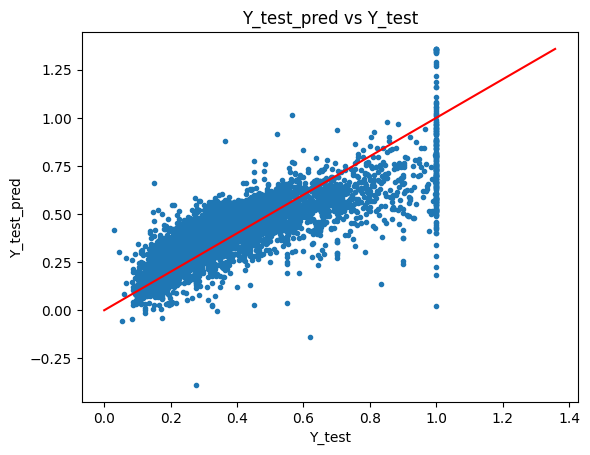

In [27]:
Y_train_pred = linear_model.predict(X_train)
Y_test_pred = linear_model.predict(X_test)
print('Evaluate model on testing set')
MSE = np.mean((Y_test - Y_test_pred)**2)
MAE = np.mean(np.abs(Y_test - Y_test_pred))
MAPE =  np.mean(np.abs(Y_test - Y_test_pred)/Y_test)
print('MSE=', MSE)
print('MAE=', MAE)
print('MAPE=', MAPE)
#step6:
# the red line is the 45-degree line
fig, ax = plt.subplots()
ax.set_title('Y_test_pred vs Y_test')
ax.plot(Y_test, Y_test_pred, '.')
ymax=np.max([Y_test.max(), Y_test_pred.max()])
ax.plot(np.linspace(0,ymax, 3), np.linspace(0, ymax, 3), '-r')
ax.set_xlabel('Y_test')
ax.set_ylabel('Y_test_pred')

In [28]:
import torch
from torch.utils.data import Dataset as torch_dataset
class MyDataset(torch_dataset):
    def __init__(self, X, Y):
        self.X=X
        self.Y=Y.reshape(-1, 1) #this is very important
    def __len__(self):
        #return the number of data points
        return self.X.shape[0]
    def __getitem__(self, idx):
        # use the notation DatasetName[idx]
        # to get a data point (x,y) by idx
        # we need to convert numpy array to torch tensor
        x=torch.tensor(self.X[idx], dtype=torch.float32)
        y=torch.tensor(self.Y[idx], dtype=torch.float32)
        return x, y

In [29]:
dataset_train= MyDataset(X_train,Y_train)
dataset_val = MyDataset(X_val, Y_val)
dataset_test = MyDataset(X_test, Y_test)

In [30]:
len(dataset_train) # get the number of data points in the training set


14860

In [31]:
from torch.utils.data import Dataset as torch_dataset
from torch.utils.data import DataLoader as torch_dataloader

dataloader_train = torch_dataloader(dataset_train, batch_size=128, shuffle=True, num_workers=0)
dataloader_val = torch_dataloader(dataset_val, batch_size=128, shuffle=False, num_workers=0)
dataloader_test = torch_dataloader(dataset_test, batch_size=128, shuffle=False, num_workers=0)

In [32]:
len(dataloader_train)

117

In [33]:
for batch_idx, (X, Y) in enumerate(dataloader_train):
    print(batch_idx, X.size(), Y.size())

0 torch.Size([128, 13]) torch.Size([128, 1])
1 torch.Size([128, 13]) torch.Size([128, 1])
2 torch.Size([128, 13]) torch.Size([128, 1])
3 torch.Size([128, 13]) torch.Size([128, 1])
4 torch.Size([128, 13]) torch.Size([128, 1])
5 torch.Size([128, 13]) torch.Size([128, 1])
6 torch.Size([128, 13]) torch.Size([128, 1])
7 torch.Size([128, 13]) torch.Size([128, 1])
8 torch.Size([128, 13]) torch.Size([128, 1])
9 torch.Size([128, 13]) torch.Size([128, 1])
10 torch.Size([128, 13]) torch.Size([128, 1])
11 torch.Size([128, 13]) torch.Size([128, 1])
12 torch.Size([128, 13]) torch.Size([128, 1])
13 torch.Size([128, 13]) torch.Size([128, 1])
14 torch.Size([128, 13]) torch.Size([128, 1])
15 torch.Size([128, 13]) torch.Size([128, 1])
16 torch.Size([128, 13]) torch.Size([128, 1])
17 torch.Size([128, 13]) torch.Size([128, 1])
18 torch.Size([128, 13]) torch.Size([128, 1])
19 torch.Size([128, 13]) torch.Size([128, 1])
20 torch.Size([128, 13]) torch.Size([128, 1])
21 torch.Size([128, 13]) torch.Size([128, 1]

In [34]:
import torch.nn as nn
import torch.nn.functional as nnF
class Net(nn.Module):
    def __init__(self, input_dim, output_dim, n_units):
        super().__init__()
        self.layer1 = nn.Linear(input_dim, n_units)
        self.layer2 = nn.Linear(n_units, n_units)
        self.layer3 = nn.Linear(n_units, output_dim)
    def forward(self, x):
        x=self.layer1(x)
        x=nnF.softplus(x)
        x=self.layer2(x)
        x=nnF.softplus(x)
        y=self.layer3(x)
        return y

In [35]:
model=Net(input_dim=13, output_dim=1, n_units=128)


In [36]:
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

Net(
  (layer1): Linear(in_features=13, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=1, bias=True)
)

In [37]:
def train(model, optimizer, dataloader, device, epoch):
    model.train()
    loss_train=0
    for batch_idx, (X, Y) in enumerate(dataloader):
        X, Y = X.to(device), Y.to(device)
        optimizer.zero_grad()
        Yp = model(X)
        loss = torch.mean((Yp-Y)**2)
        loss.backward()
        optimizer.step()
        loss_train+=loss.item()
        if batch_idx % 1 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    epoch, batch_idx * X.size(0), len(dataloader.dataset),
                    100. * batch_idx / len(dataloader), loss.item()))
    loss_train/=len(dataloader)
    return loss_train

In [38]:
def test(model, dataloader, device):
    model.eval()#set model to evaluation mode
    loss_test=0
    mae_test=0
    mape_test=0
    sample_count=0
    with torch.no_grad(): # tell Pytorch not to build graph in the 'with' section
        for batch_idx, (X, Y) in enumerate(dataloader):
            X, Y = X.to(device), Y.to(device)
            Yp = model(X)#forward pass
            loss_test+=torch.sum((Yp-Y)**2).item()
            mae_test+= torch.sum((Yp-Y).abs()).item()
            mape_test+= torch.sum(((Yp-Y)/Yp).abs()).item()
            sample_count+=X.size(0)
    loss_test/=sample_count
    mae_test/=sample_count
    mape_test/=sample_count
    return loss_test, mae_test ,mape_test

In [39]:
import torch.optim as optim
optimizer = torch.optim.Adam(model.parameters(), lr=0.01,weight_decay=1e-4)

In [40]:
loss_train_list=[]
loss_val_list=[]

In [41]:
for epoch in range(0, 100):

    loss_train=train(model, optimizer, dataloader_train, device, epoch)
    loss_train_list.append(loss_train)
    print('epoch', epoch, 'training loss:', loss_train)


    loss_val, mae_val,mape_test = test(model, dataloader_val, device)
    loss_val_list.append(loss_val)
    print('epoch', epoch, 'validation loss:', loss_val)

Streaming output truncated to the last 5000 lines.
epoch 57 training loss: 0.01945167702710272
epoch 57 validation loss: 0.02016325190338615
Train Epoch: 58 [0/14860 (0%)]	Loss: 0.021028
Train Epoch: 58 [128/14860 (1%)]	Loss: 0.021340
Train Epoch: 58 [256/14860 (2%)]	Loss: 0.023559
Train Epoch: 58 [384/14860 (3%)]	Loss: 0.015124
Train Epoch: 58 [512/14860 (3%)]	Loss: 0.018895
Train Epoch: 58 [640/14860 (4%)]	Loss: 0.023489
Train Epoch: 58 [768/14860 (5%)]	Loss: 0.026734
Train Epoch: 58 [896/14860 (6%)]	Loss: 0.015049
Train Epoch: 58 [1024/14860 (7%)]	Loss: 0.019627
Train Epoch: 58 [1152/14860 (8%)]	Loss: 0.018974
Train Epoch: 58 [1280/14860 (9%)]	Loss: 0.014207
Train Epoch: 58 [1408/14860 (9%)]	Loss: 0.020627
Train Epoch: 58 [1536/14860 (10%)]	Loss: 0.015835
Train Epoch: 58 [1664/14860 (11%)]	Loss: 0.027593
Train Epoch: 58 [1792/14860 (12%)]	Loss: 0.031617
Train Epoch: 58 [1920/14860 (13%)]	Loss: 0.020956
Train Epoch: 58 [2048/14860 (14%)]	Loss: 0.019503
Train Epoch: 58 [2176/14860 (15

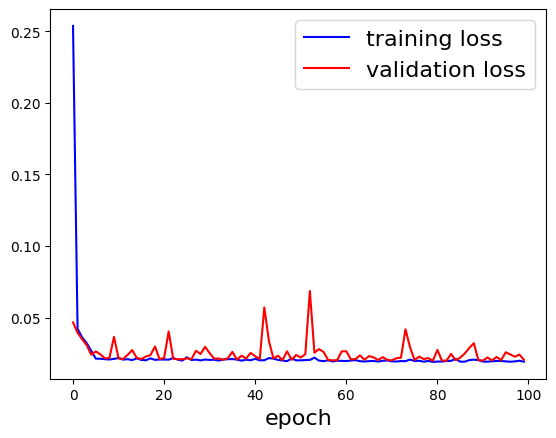

In [42]:
fig, ax = plt.subplots()
ax.plot(np.arange(0,len(loss_train_list)), loss_train_list, '-b', label='training loss')
ax.plot(np.arange(0,len(loss_val_list)), loss_val_list, '-r', label='validation loss')
ax.set_xlabel('epoch',fontsize=16)
ax.legend(fontsize=16)

In [43]:
Yp_test=[]
with torch.no_grad(): # tell Pytorch not to build graph in the 'with' section
    for batch_idx, (X, Y) in enumerate(dataloader_test):
        X, Y = X.to(device), Y.to(device)
        Yp = model(X)#forward pass
        Yp_test.append(Yp.detach().cpu().numpy())
Yp_test=np.concatenate(Yp_test, axis=0).squeeze()

In [44]:
print('Evaluate model on testing set')
mse_test, mae_test,mape_test = test(model, dataloader_test, device)
print('MSE=', mse_test)
print('MAE=', mae_test)
print('MAPE=', mape_test)

Evaluate model on testing set
MSE= 0.019154333805506542
MAE= 0.10219303691803022
MAPE= 0.26613945300264874


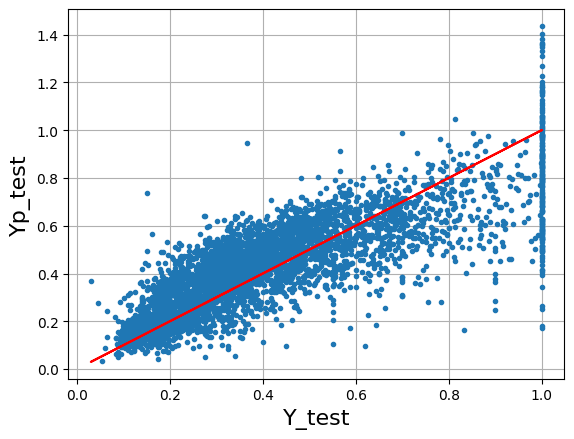

In [45]:
fig, ax = plt.subplots()
ax.plot(Y_test, Yp_test, '.')
ax.plot(Y_test, Y_test, 'r-')
ax.set_xlabel('Y_test', fontsize=16)
ax.set_ylabel('Yp_test', fontsize=16)
ax.grid(True)

In [46]:
import torch
from torch.utils.data import Dataset as torch_dataset
class MyDataset(torch_dataset):
    def __init__(self, X, Y):
        self.X=X
        self.Y=Y.reshape(-1, 1) #this is very important
    def __len__(self):
        #return the number of data points
        return self.X.shape[0]
    def __getitem__(self, idx):
        # use the notation DatasetName[idx]
        # to get a data point (x,y) by idx
        # we need to convert numpy array to torch tensor
        x=torch.tensor(self.X[idx], dtype=torch.float32)
        y=torch.tensor(self.Y[idx], dtype=torch.float32)
        return x, y

In [47]:
dataset_train= MyDataset(X_train,Y_train)
dataset_val = MyDataset(X_val, Y_val)
dataset_test = MyDataset(X_test, Y_test)

In [48]:
from torch.utils.data import Dataset as torch_dataset
from torch.utils.data import DataLoader as torch_dataloader

dataloader_train = torch_dataloader(dataset_train, batch_size=128, shuffle=True, num_workers=0)
dataloader_val = torch_dataloader(dataset_val, batch_size=128, shuffle=False, num_workers=0)
dataloader_test = torch_dataloader(dataset_test, batch_size=128, shuffle=False, num_workers=0)

In [49]:
for batch_idx, (X, Y) in enumerate(dataloader_train):
    print(batch_idx, X.size(), Y.size())

0 torch.Size([128, 13]) torch.Size([128, 1])
1 torch.Size([128, 13]) torch.Size([128, 1])
2 torch.Size([128, 13]) torch.Size([128, 1])
3 torch.Size([128, 13]) torch.Size([128, 1])
4 torch.Size([128, 13]) torch.Size([128, 1])
5 torch.Size([128, 13]) torch.Size([128, 1])
6 torch.Size([128, 13]) torch.Size([128, 1])
7 torch.Size([128, 13]) torch.Size([128, 1])
8 torch.Size([128, 13]) torch.Size([128, 1])
9 torch.Size([128, 13]) torch.Size([128, 1])
10 torch.Size([128, 13]) torch.Size([128, 1])
11 torch.Size([128, 13]) torch.Size([128, 1])
12 torch.Size([128, 13]) torch.Size([128, 1])
13 torch.Size([128, 13]) torch.Size([128, 1])
14 torch.Size([128, 13]) torch.Size([128, 1])
15 torch.Size([128, 13]) torch.Size([128, 1])
16 torch.Size([128, 13]) torch.Size([128, 1])
17 torch.Size([128, 13]) torch.Size([128, 1])
18 torch.Size([128, 13]) torch.Size([128, 1])
19 torch.Size([128, 13]) torch.Size([128, 1])
20 torch.Size([128, 13]) torch.Size([128, 1])
21 torch.Size([128, 13]) torch.Size([128, 1]

In [50]:
import torch.nn as nn
import torch.nn.functional as nnF

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class Net(nn.Module):
    def __init__(self, input_dim, output_dim, n_units):
        super().__init__()
        self.layer1 = nn.Linear(input_dim, n_units)
        self.layer2 = nn.Linear(n_units, n_units)
        self.layer3 = nn.Linear(n_units, n_units)
        self.layer4 = nn.Linear(n_units, output_dim)
    def forward(self, x):
        x=self.layer1(x)
        x=torch.sigmoid(x)
        x=self.layer2(x)
        x=torch.sigmoid(x)
        x=self.layer3(x)
        x=torch.sigmoid(x)
        y=self.layer4(x)
        return y

In [51]:
model=Net(input_dim=13, output_dim=1, n_units=128)


In [52]:
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

Net(
  (layer1): Linear(in_features=13, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=128, bias=True)
  (layer4): Linear(in_features=128, out_features=1, bias=True)
)

In [53]:
def train(model, optimizer, dataloader, device, epoch):
    model.train()
    loss_train=0
    for batch_idx, (X, Y) in enumerate(dataloader):
        X, Y = X.to(device), Y.to(device)
        optimizer.zero_grad()
        Yp = model(X)
        loss = torch.mean((Yp-Y)**2)
        loss.backward()
        optimizer.step()
        loss_train+=loss.item()
        if batch_idx % 1 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    epoch, batch_idx * X.size(0), len(dataloader.dataset),
                    100. * batch_idx / len(dataloader), loss.item()))
    loss_train/=len(dataloader)
    return loss_train

In [54]:
def test(model, dataloader, device):
    model.eval()#set model to evaluation mode
    loss_test=0
    mae_test=0
    mape_test=0
    sample_count=0
    with torch.no_grad(): # tell Pytorch not to build graph in the 'with' section
        for batch_idx, (X, Y) in enumerate(dataloader):
            X, Y = X.to(device), Y.to(device)
            Yp = model(X)#forward pass
            loss_test+=torch.sum((Yp-Y)**2).item()
            mae_test+= torch.sum((Yp-Y).abs()).item()
            mape_test+= torch.sum(((Yp-Y)/Yp).abs()).item()
            sample_count+=X.size(0)
    loss_test/=sample_count
    mae_test/=sample_count
    mape_test/=sample_count
    return loss_test, mae_test ,mape_test

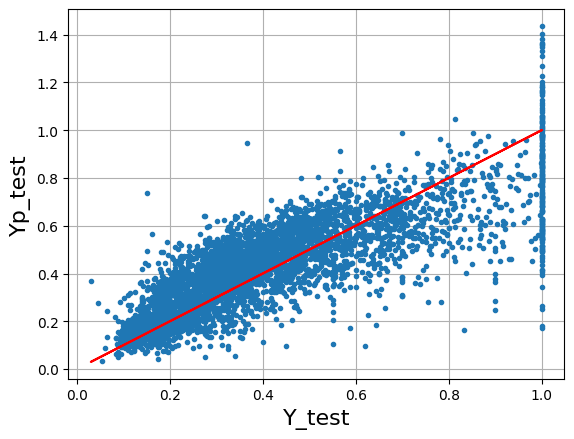

In [55]:
fig, ax = plt.subplots()
ax.plot(Y_test, Yp_test, '.')
ax.plot(Y_test, Y_test, 'r-')
ax.set_xlabel('Y_test', fontsize=16)
ax.set_ylabel('Yp_test', fontsize=16)
ax.grid(True)


In [56]:
import torch
from torch.utils.data import Dataset as torch_dataset
class MyDataset(torch_dataset):
    def __init__(self, X, Y):
        self.X=X
        self.Y=Y.reshape(-1, 1) #this is very important
    def __len__(self):
        #return the number of data points
        return self.X.shape[0]
    def __getitem__(self, idx):
        # use the notation DatasetName[idx]
        # to get a data point (x,y) by idx
        # we need to convert numpy array to torch tensor
        x=torch.tensor(self.X[idx], dtype=torch.float32)
        y=torch.tensor(self.Y[idx], dtype=torch.float32)
        return x, y

In [57]:
dataset_train= MyDataset(X_train,Y_train)
dataset_val = MyDataset(X_val, Y_val)
dataset_test = MyDataset(X_test, Y_test)

In [58]:
from torch.utils.data import Dataset as torch_dataset
from torch.utils.data import DataLoader as torch_dataloader

dataloader_train = torch_dataloader(dataset_train, batch_size=128, shuffle=True, num_workers=0)
dataloader_val = torch_dataloader(dataset_val, batch_size=128, shuffle=False, num_workers=0)
dataloader_test = torch_dataloader(dataset_test, batch_size=128, shuffle=False, num_workers=0)

In [59]:
for batch_idx, (X, Y) in enumerate(dataloader_train):
    print(batch_idx, X.size(), Y.size())

0 torch.Size([128, 13]) torch.Size([128, 1])
1 torch.Size([128, 13]) torch.Size([128, 1])
2 torch.Size([128, 13]) torch.Size([128, 1])
3 torch.Size([128, 13]) torch.Size([128, 1])
4 torch.Size([128, 13]) torch.Size([128, 1])
5 torch.Size([128, 13]) torch.Size([128, 1])
6 torch.Size([128, 13]) torch.Size([128, 1])
7 torch.Size([128, 13]) torch.Size([128, 1])
8 torch.Size([128, 13]) torch.Size([128, 1])
9 torch.Size([128, 13]) torch.Size([128, 1])
10 torch.Size([128, 13]) torch.Size([128, 1])
11 torch.Size([128, 13]) torch.Size([128, 1])
12 torch.Size([128, 13]) torch.Size([128, 1])
13 torch.Size([128, 13]) torch.Size([128, 1])
14 torch.Size([128, 13]) torch.Size([128, 1])
15 torch.Size([128, 13]) torch.Size([128, 1])
16 torch.Size([128, 13]) torch.Size([128, 1])
17 torch.Size([128, 13]) torch.Size([128, 1])
18 torch.Size([128, 13]) torch.Size([128, 1])
19 torch.Size([128, 13]) torch.Size([128, 1])
20 torch.Size([128, 13]) torch.Size([128, 1])
21 torch.Size([128, 13]) torch.Size([128, 1]

In [60]:
import torch.nn as nn
import torch.nn.functional as nnF

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class Net(nn.Module):
    def __init__(self, input_dim, output_dim, n_units):
        super().__init__()
        self.layer1 = nn.Linear(input_dim, n_units)
        self.layer2 = nn.Linear(n_units, n_units)
        self.layer3 = nn.Linear(n_units, n_units)
        self.layer4 = nn.Linear(n_units, output_dim)
    def forward(self, x):
        x=self.layer1(x)
        x=torch.sigmoid(x)
        x=self.layer2(x)
        x=torch.sigmoid(x)
        x=self.layer3(x)
        x=torch.sigmoid(x)
        y=self.layer4(x)
        return y

In [61]:
model=Net(input_dim=13, output_dim=1, n_units=128)


In [62]:
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

Net(
  (layer1): Linear(in_features=13, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=128, bias=True)
  (layer4): Linear(in_features=128, out_features=1, bias=True)
)

In [63]:
def train(model, optimizer, dataloader, device, epoch):
    model.train()
    loss_train=0
    for batch_idx, (X, Y) in enumerate(dataloader):
        X, Y = X.to(device), Y.to(device)
        optimizer.zero_grad()
        Yp = model(X)
        loss = torch.mean((Yp-Y)**2)
        loss.backward()
        optimizer.step()
        loss_train+=loss.item()
        if batch_idx % 1 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    epoch, batch_idx * X.size(0), len(dataloader.dataset),
                    100. * batch_idx / len(dataloader), loss.item()))
    loss_train/=len(dataloader)
    return loss_train

In [64]:
def test(model, dataloader, device):
    model.eval()#set model to evaluation mode
    loss_test=0
    mae_test=0
    mape_test=0
    sample_count=0
    with torch.no_grad(): # tell Pytorch not to build graph in the 'with' section
        for batch_idx, (X, Y) in enumerate(dataloader):
            X, Y = X.to(device), Y.to(device)
            Yp = model(X)#forward pass
            loss_test+=torch.sum((Yp-Y)**2).item()
            mae_test+= torch.sum((Yp-Y).abs()).item()
            mape_test+= torch.sum(((Yp-Y)/Yp).abs()).item()
            sample_count+=X.size(0)
    loss_test/=sample_count
    mae_test/=sample_count
    mape_test/=sample_count
    return loss_test, mae_test ,mape_test

In [65]:
import torch.optim as optim
optimizer = torch.optim.Adam(model.parameters(), lr=0.01,weight_decay=1e-4)

In [66]:
loss_train_list=[]
loss_val_list=[]
mae_val_list=[]

In [67]:
for epoch in range(0, 100):

    loss_train=train(model, optimizer, dataloader_train, device, epoch)
    loss_train_list.append(loss_train)
    print('epoch', epoch, 'training loss:', loss_train)


    loss_val, mae_val,mape_test = test(model, dataloader_val, device)
    loss_val_list.append(loss_val)
    mae_val_list.append(mae_val)
    print('epoch', epoch, 'validation loss:', loss_val)

Streaming output truncated to the last 5000 lines.
epoch 57 training loss: 0.021809717051239096
epoch 57 validation loss: 0.10606746350304555
Train Epoch: 58 [0/14860 (0%)]	Loss: 0.106134
Train Epoch: 58 [128/14860 (1%)]	Loss: 0.025902
Train Epoch: 58 [256/14860 (2%)]	Loss: 0.079732
Train Epoch: 58 [384/14860 (3%)]	Loss: 0.016780
Train Epoch: 58 [512/14860 (3%)]	Loss: 0.055283
Train Epoch: 58 [640/14860 (4%)]	Loss: 0.018718
Train Epoch: 58 [768/14860 (5%)]	Loss: 0.033659
Train Epoch: 58 [896/14860 (6%)]	Loss: 0.051679
Train Epoch: 58 [1024/14860 (7%)]	Loss: 0.029247
Train Epoch: 58 [1152/14860 (8%)]	Loss: 0.041210
Train Epoch: 58 [1280/14860 (9%)]	Loss: 0.019963
Train Epoch: 58 [1408/14860 (9%)]	Loss: 0.047143
Train Epoch: 58 [1536/14860 (10%)]	Loss: 0.030274
Train Epoch: 58 [1664/14860 (11%)]	Loss: 0.023556
Train Epoch: 58 [1792/14860 (12%)]	Loss: 0.035008
Train Epoch: 58 [1920/14860 (13%)]	Loss: 0.016365
Train Epoch: 58 [2048/14860 (14%)]	Loss: 0.041974
Train Epoch: 58 [2176/14860 (1

In [68]:
Yp_test=[]
with torch.no_grad(): # tell Pytorch not to build graph in the 'with' section
    for batch_idx, (X, Y) in enumerate(dataloader_test):
        X, Y = X.to(device), Y.to(device)
        Yp = model(X)#forward pass
        Yp_test.append(Yp.detach().cpu().numpy())
Yp_test=np.concatenate(Yp_test, axis=0).squeeze()

In [69]:
print('Evaluate model on testing set')
mse_test, mae_test,mape_test = test(model, dataloader_test, device)
print('MSE=', mse_test)
print('MAE=', mae_test)
print('MAPE=', mape_test)

Evaluate model on testing set
MSE= 0.019383713935119236
MAE= 0.10092782079018364
MAPE= 0.2616167352643124


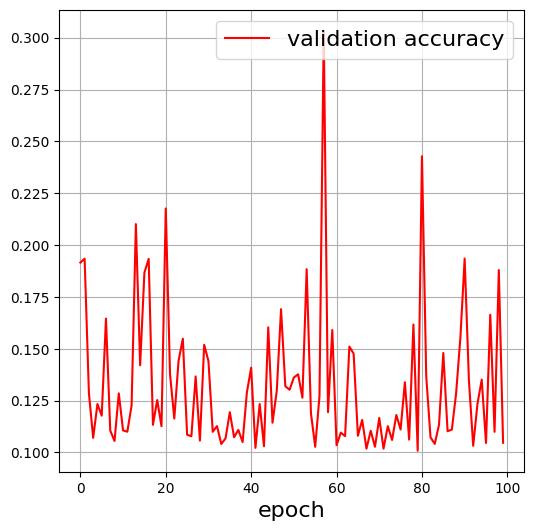

In [70]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
ax.plot(np.arange(0,len(mae_val_list)), mae_val_list, '-r', label='validation accuracy')
ax.set_xlabel('epoch',fontsize=16)
ax.legend(fontsize=16)
ax.grid(True)

In [71]:
X=housing.drop(['median_house_value'], axis=1)
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0


In [72]:
Y=housing['median_house_value']
Y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [73]:
X_columns=X.columns #store the column names
X=X.values
Y=Y.values

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
#split X_train and Y_train into a 'pure' training set and a validation set
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=0)
print('train:', X_train.shape, Y_train.shape)
print('validation:', X_val.shape, Y_val.shape)
print('test:', X_test.shape, Y_test.shape)

train: (14860, 13) (14860,)
validation: (1652, 13) (1652,)
test: (4128, 13) (4128,)


In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train) # think about why fit to X_train, not X ?
X_train=scaler.transform(X_train)
X_val=scaler.transform(X_val)
X_test=scaler.transform(X_test)

In [76]:
from xgboost.sklearn import XGBRegressor
import xgboost as xgb
model = xgb.XGBClassifier(n_estimators=20, random_state=0, objective='reg:squarederror')

In [77]:
max_depth=30

max_depth_list=np.arange(1,max_depth+1)

max_depth_list


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [78]:
MAE_train_list=[]
MAE_val_list=[]

for k in max_depth_list:
    model=xgb.XGBRegressor(n_estimators=20,max_depth=k,random_state=0, objective='reg:squarederror')
    model.fit(X_train, Y_train)

    Y_val_pred=model.predict(X_val)
    MAE_val = np.mean(np.abs(Y_val - Y_val_pred))

    Y_train_pred=model.predict(X_train)
    MAE_training = np.mean(np.abs(Y_train - Y_train_pred))

    MAE_train_list.append(MAE_training)
    MAE_val_list.append(MAE_val)

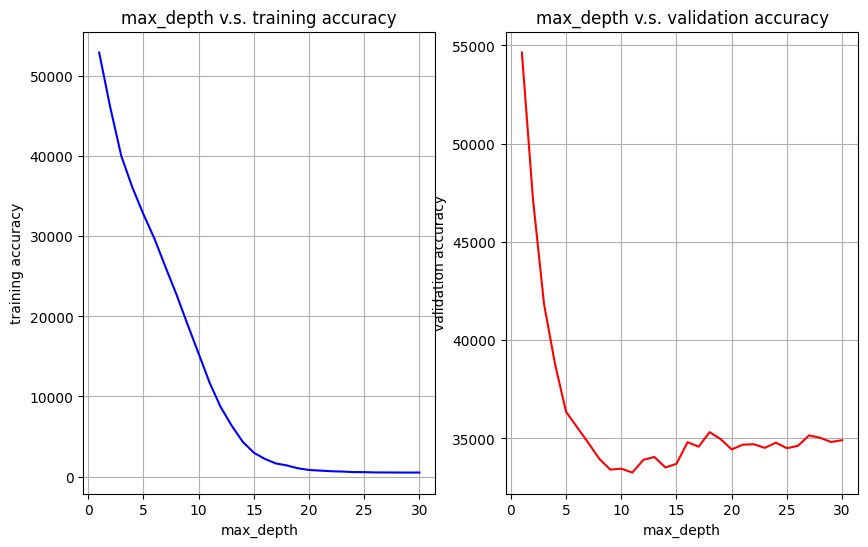

In [79]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].plot(max_depth_list, MAE_train_list, 'b')
ax[0].set_xlabel('max_depth')
ax[0].set_ylabel('training accuracy')
ax[0].set_title('max_depth v.s. training accuracy')
ax[0].grid(True)

ax[1].plot(max_depth_list, MAE_val_list, 'r')
ax[1].set_xlabel('max_depth')
ax[1].set_ylabel('validation accuracy')
ax[1].set_title('max_depth v.s. validation accuracy')
ax[1].grid(True)

In [80]:
Temp1 = np.argmin(MAE_val_list,axis=0)
max_depth_best =(max_depth_list[Temp1])
max_depth_best

11

In [81]:
model = xgb.XGBRegressor(n_estimators=20,max_depth=max_depth_best,random_state=0, objective='reg:squarederror')
model.fit(X_train, Y_train)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print('Evaluate model on traning set')
MSE_XGBoost = np.mean((Y_train - Y_train_pred)**2)
MAE_XGBoost= np.mean(np.abs(Y_train - Y_train_pred))
MAPE_XGBoost =  np.mean(np.abs(Y_train - Y_train_pred)/Y_train)
print('MSE=', MSE_XGBoost )
print('MAE=', MAE_XGBoost)


print('Evaluate model on testing set')
MSE_XGBoost = np.mean((Y_test - Y_test_pred)**2)
MAE_XGBoost= np.mean(np.abs(Y_test - Y_test_pred))
MAPE_XGBoost =  np.mean(np.abs(Y_test - Y_test_pred)/Y_test)
print('MSE=', MSE_XGBoost)
print('MAE=', MAE_XGBoost)

Evaluate model on traning set
MSE= 304213803.6713753
MAE= 11723.399843723713
Evaluate model on testing set
MSE= 2291837107.90727
MAE= 31851.727587322857


In [82]:
print('MLP model', 'MSE=',round(mse_test,9),'MAE=',round(mae_test,8), 'MAPE=',round(mape_test,8))
print('XGBoost  ', 'MSE=',MSE_XGBoost, 'MAE=',MAE_XGBoost, 'MAPE=',MAPE_XGBoost)

MLP model MSE= 0.019383714 MAE= 0.10092782 MAPE= 0.26161674
XGBoost   MSE= 2291837107.90727 MAE= 31851.727587322857 MAPE= 0.17896494918430192


In [83]:
import statistics

print('MLP model',statistics.mean(mae_val_list))

print('XGBoost',MAE_val_list[max_depth_best])

MLP model 0.13198574133127133
XGBoost 33908.955179801
